# Best Neighborhoods in Pittsburgh based on Farmers Market

### by Nate Quigley

### Introduction:

#### I am exploring the relationship between neighborhoods in Pittsburgh and their access to quality food and local farmers markets. 
#### To do this, I will start by analyzing a CSV dataset of farmers markets in Pittsburgh, which includes information on the name and location of each respective market. We will then combine this data with several visualizations to help us better understand the relationship between neighborhoods, ultimately deriving a "best" neighborhood based solely (In my specifc metric's case) its concentration of Farmer's Markets.

 * Importing the neccesary tools for the data below


In [27]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
%matplotlib inline
import geopandas as gpd
import seaborn as sns
import geopandas

#### Reading the CSV

In [28]:
df = pd.read_csv("farmersmarket.csv")
df.head(5)

fid                                          name          x          y  \
0    1              5 Generation Bakers—Green Grocer -80.068177  40.465622   
1    2  A Child’s World Day Care Center—Green Grocer -79.881320  40.412364   
2    3       Alma Illery Medical Center—Green Grocer -79.896214  40.454592   
3    4                         Aspinwall Flea Market -79.904517  40.489755   
4    5              Bachman’s Greenhouse and Nursery -79.711238  40.639294   

                location                address             city state    zip  \
0                         1100 Chartiers Avenue     McKees Rocks    PA  15136   
1                              300 Rankin Blvd.           Rankin    PA  15104   
2                          7227 Hamilton Avenue       Pittsburgh    PA  15208   
3  Municipal parking lot      250 Freeport Road       Pittsburgh    PA  15215   
4                            2903 Freeport Road  Natrona Heights    PA  15065   

                   day_time         season  
0  Tuesday 12:00 PM—1:00 PM  June—November  
1  Thursday 4:30 PM—5:30 PM  June—November  
2  Friday 11:30 AM—12:30 PM  June—November  
3    Sunday 7:00 AM—1:00 PM                 
4     Daily 9:00 AM—7:00 PM  June—November

#### Removing all cities other than Pittsburgh since that is the city that we are focusing on

In [29]:
df = df[df['city'] == 'Pittsburgh']
df.head(5)

fid                                     name          x          y  \
2     3  Alma Illery Medical Center—Green Grocer -79.896214  40.454592   
3     4                    Aspinwall Flea Market -79.904517  40.489755   
7     8      Beechview Farmer’s Market—Citiparks -80.024680  40.410619   
9    10               Bloomfield Farmer’s Market -79.944362  40.459080   
12   13         Carrick Dairy District—Citiparks -79.988647  40.400038   

                              location                address        city  \
2                                        7227 Hamilton Avenue  Pittsburgh   
3                Municipal parking lot      250 Freeport Road  Pittsburgh   
7   Broadway Avenue & Beechview Avenue        Broadway Avenue  Pittsburgh   
9                                         5050 Liberty Avenue  Pittsburgh   
12                                      1529 Brownsville Road  Pittsburgh   

   state    zip                   day_time                season  
2     PA  15208   Friday 11:30 AM—12:30 PM         June—November  
3     PA  15215     Sunday 7:00 AM—1:00 PM                        
7     PA  15216   Thursday 4:00 pm—7:00 pm  June 22—September 14  
9     PA  15224   Saturday 9:00 AM—1:00 PM        June--November  
12    PA  15210  Wednesday 3:00 PM—7:00 PM   June 21—November 22

#### My next step is to import a Folium module to display the frequency of Farmer's Markets in specifc popolus locations. 

In [30]:
import pandas as pd
import folium

# Load the data from the CSV file into a Pandas DataFrame
df = pd.read_csv('farmersmarket.csv')

# Filter the data to only include records where the city is "Pittsburgh"
df = df[df['city'] == 'Pittsburgh']

# Count the number of farmers markets in each neighborhood
fm_counts = df['location'].value_counts()

# Create a bubble map of the number of farmers markets in each neighborhood
fm_bubblemap = folium.Map(location=[40.4406, -79.9959], zoom_start=12)
for index, row in fm_counts.iteritems():
    folium.CircleMarker(location=[df[df['location'] == index].iloc[0]['y'],
                                   df[df['location'] == index].iloc[0]['x']],
                        radius=row*2,
                        color='blue',
                        fill=True,
                        fill_color='blue').add_to(fm_bubblemap)
fm_bubblemap.save('fm_bubblemap.html')

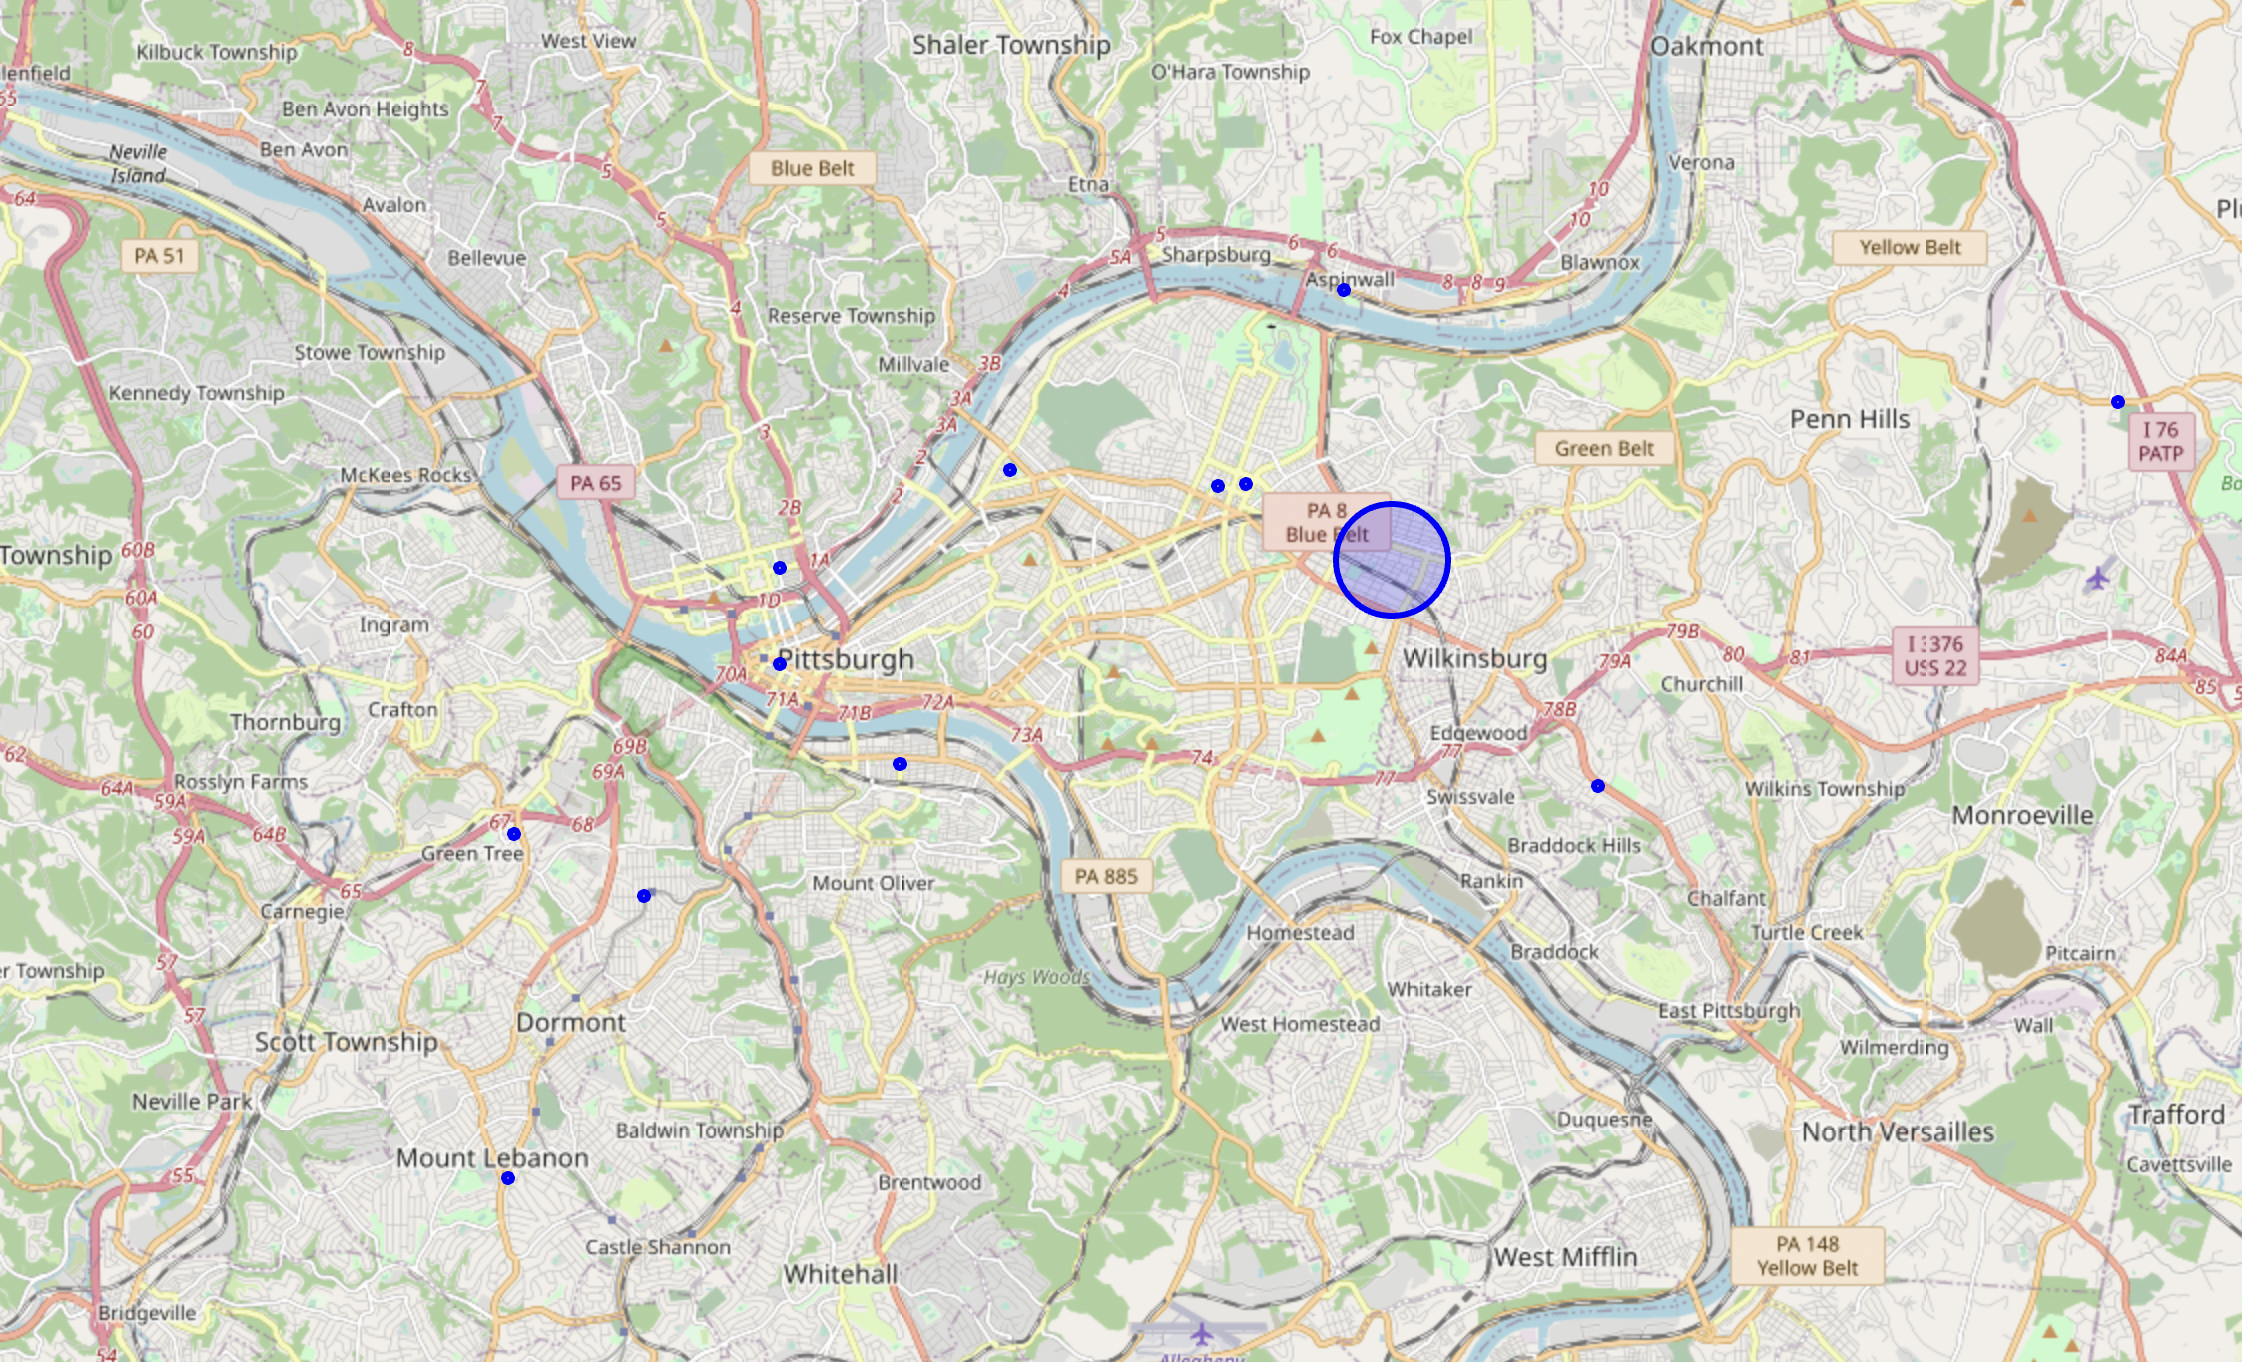

##### As shown in the map above, there is an exponentially large proportion of Farmer's Markets directly west of downtown Pittsburgh. 

##### Based on the CSV taken, there is insufficent data in regards to listed neighborhoods in vicinity to Pittsburgh...However, we can compare the blue circle plot map to a nomral map of the greater Pittsburgh area, showing that Point Breeze North has the largest concentration of Farmer's Markets in the PGH area. 

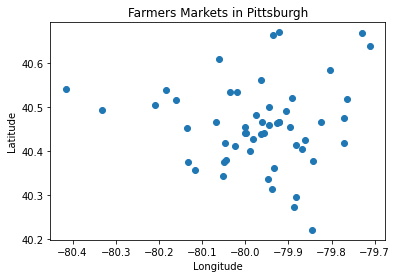

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file into a Pandas DataFrame
df = pd.read_csv('farmersmarket.csv')

# Create a scatter plot of the farmers markets using the x and y coordinates
plt.scatter(df['x'], df['y'])

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Farmers Markets in Pittsburgh')

# Show the plot
plt.show()

#### The latitutude logitude graphic provided above further confirms this declaration, as Point Breeze North has coordinates of 40.4436° N, 79.9053° W, placing it directly in the middle of the mass of blue dots. 

![alt-text](https://media.giphy.com/media/QELyuhdldC012/giphy.gif)

#### POINT BREEZE NORTH IS OUR WINNER!